### **1. 와인 등급 예측**

In [2]:
#코드 11-14
import numpy as np
import pandas as pd
import plotly.express as px
df_white = pd.read_csv('winequality-white.csv', sep=';')
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_wine_predic = pd.concat([df_white, df_red])
px.histogram(df_wine_predic.quality)

In [3]:
df_wine_predic

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


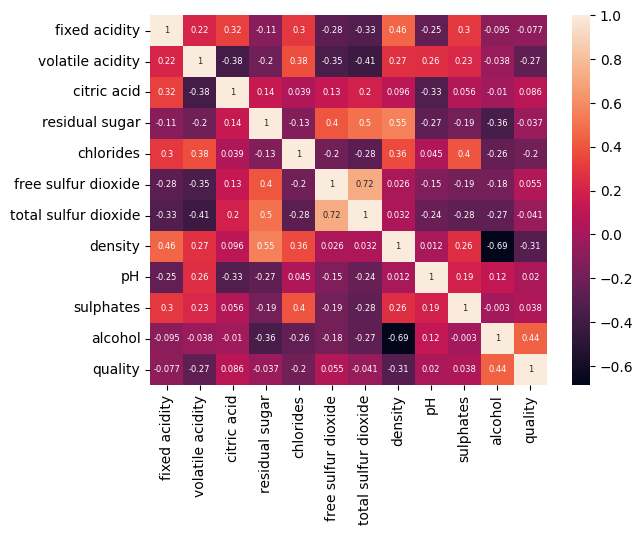

In [4]:
#코드 11-15
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(df_wine_predic.corr(), annot=True, annot_kws={'size':6})
plt.show()

In [5]:
#코드 11-16
from sklearn.model_selection import train_test_split

df_wine_predic.columns = df_wine_predic.columns.str.replace(' ', '_')
train, test = train_test_split(df_wine_predic, test_size=0.3, random_state=0,
                               stratify=df_wine_predic['quality'])

train_X = train[train.columns[:11]]
train_Y = train[train.columns[11:]]
test_X = test[test.columns[:11]]
test_Y = test[test.columns[11:]]

In [6]:
#코드 11-17
from statsmodels.formula.api import ols, glm
reg_form = 'quality ~ fixed_acidity + volatile_acidity + citric_acid\
            + residual_sugar + chlorides + free_sulfur_dioxide\
            + total_sulfur_dioxide + density + pH + sulphates + alcohol'
reg_result = ols(reg_form, data=train).fit()

In [7]:
#코드 11-18
reg_predict = reg_result.predict(test)
print(reg_predict)
reg_predict = reg_predict.astype('int')

1209    6.209276
3193    5.647934
1192    6.724634
3852    6.538731
2022    5.294939
          ...   
305     5.485388
1963    5.194879
4305    6.015268
4798    5.933790
1384    4.731303
Length: 1950, dtype: float64


In [8]:
#코드 11-19
from sklearn import metrics
print('다중 선형회귀 알고리즘 예측 정확도:', metrics.accuracy_score(reg_predict,test_Y))

다중 선형회귀 알고리즘 예측 정확도: 0.4574358974358974


In [9]:
#코드 11-20
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
pred_RF = model.predict(test_X)
print('랜덤 포레스트 알고리즘 예측 정확도:', metrics.accuracy_score(pred_RF, test_Y))

C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



랜덤 포레스트 알고리즘 예측 정확도: 0.6564102564102564


### **2. 와인 등급 예측**

In [12]:
#코드 11-21
from keras.models import Sequential
from keras.layers import Dense

In [13]:
#코드 11-22 입력층
model = Sequential()
model.add(Dense(64,input_dim=11, activation='relu'))

C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [14]:
#코드 11-23 은닉층
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

In [ ]:
#코드 11-24
model.add(Dense(7, activation = 'softmax'))
model.summary()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(11,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(7, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,575 (13.96 KB)

 Trainable params: 3,575 (13.96 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#코드 11-25
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
#코드 11-26
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

#레이블을 학습 데이터 레이블 모형으로 변환하기
encoder = LabelEncoder()
encoder.fit(train_Y)

onehot_train_Y = encoder.transform(train_Y)
train_f_Y = to_categorical(onehot_train_Y)
onehot_test_Y = encoder.transform(test_Y)
test_f_Y = to_categorical(onehot_test_Y)

print(test_f_Y)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [20]:
#코드 11-27
model.fit(train_X, train_f_Y, epochs=500, batch_size=10)

Epoch 1/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.3518 - loss: 2.1922
Epoch 2/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.4162 - loss: 1.3142
Epoch 3/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.4317 - loss: 1.2707
Epoch 4/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.4268 - loss: 1.2891
Epoch 5/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.4201 - loss: 1.2687
Epoch 6/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.4320 - loss: 1.2623
Epoch 7/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.4307 - loss: 1.2857
Epoch 8/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.4260 - loss: 1.2583
Epoch 9/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.4425 - loss: 1.2421
Epoch 10/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.4384 - loss: 1.2701
Epoch 11/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.4313 - loss: 1.2667
Epoch 12/500
455/45

In [21]:
#코드 11-28
model.evaluate(test_X, test_f_Y)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.5421 - loss: 1.2612


[1.3161884546279907, 0.5574358701705933]